In [1]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles
Random.seed!(123)
include("src/QuantumResource1D.jl")
include("src/HL_module.jl")

all_params_mat = readdlm("DATA/all_params_mat.txt") 
g_vals = vec(readdlm("DATA/g_values.txt"));

In [2]:
N = 5

λ_vals, Fidelities_HL = [], []
H_params, delta_E_HL = [], []
HL_X_exp, HL_O_exp, HL_ZZ_exp = [], [], []

for ind_g in 1:length(g_vals)
    println("Current value: g = $(g_vals[ind_g])")
    θ_g = all_params_mat[:, ind_g]

    qr_g = QR1D.QuantumResource1D(N)
    psi_g = QR1D.apply_ladder_circuit(qr_g, θ_g)

    hl_g = HL1D.HamiltonianLearner(psi_g)
    λ_min_g, v_min_g = HL1D.LearnHamiltonian_corr_mat(hl_g)

    push!(λ_vals, λ_min_g)
    push!(H_params, v_min_g)
    push!(delta_E_HL, hl_g.E_psi - hl_g.E_GS)
    push!(Fidelities_HL, hl_g.Fidelity)

    push!(HL_X_exp, real(inner(hl_g.ψ_GS, qr_g.aux_ops[1], hl_g.ψ_GS)))
    push!(HL_O_exp, real(inner(hl_g.ψ_GS, qr_g.aux_ops[2], hl_g.ψ_GS)))
    push!(HL_ZZ_exp, real(inner(hl_g.ψ_GS, qr_g.aux_ops[3], hl_g.ψ_GS)))
end

Current value: g = -1.0


┌ Warning: Calling `inner(x::MPS, A::MPO, y::MPS)` where the site indices of the `MPS`
│ `x` and the `MPS` resulting from contracting `MPO` `A` with `MPS` `y` don't
│ match is deprecated as of ITensors v0.3 and will result in an error in ITensors
│ v0.4. The most common cause of this is something like the following:
│ 
│ ```julia
│ s = siteinds("S=1/2")
│ psi = random_mps(s)
│ H = MPO(s, "Id")
│ inner(psi, H, psi)
│ ```
│ 
│ `psi` has the Index structure `-s-(psi)` and `H` has the Index structure
│ `-s'-(H)-s-`, so the Index structure of would be `(dag(psi)-s- -s'-(H)-s-(psi)`
│  unless the prime levels were fixed. Previously we tried fixing the prime level
│   in situations like this, but we will no longer be doing that going forward.
│ 
│ There are a few ways to fix this. You can simply change:
│ 
│ ```julia
│ inner(psi, H, psi)
│ ```
│ 
│ to:
│ 
│ ```julia
│ inner(psi', H, psi)
│ ```
│ 
│ in which case the Index structure will be `(dag(psi)-s'-(H)-s-(psi)`.
│ 
│ Alternatively, you c

Degeneracy = 8
After sweep 1 energy=-5.179286934671322  maxlinkdim=2 maxerr=4.32E-16 time=3.232
After sweep 2 energy=-5.179286934671319  maxlinkdim=2 maxerr=4.36E-16 time=0.010
After sweep 3 energy=-5.179286934671318  maxlinkdim=2 maxerr=3.33E-16 time=0.001
After sweep 4 energy=-5.179286934671321  maxlinkdim=2 maxerr=4.09E-16 time=0.001
After sweep 5 energy=-5.179286934671325  maxlinkdim=2 maxerr=4.35E-16 time=0.001
After sweep 6 energy=-5.1792869346713255  maxlinkdim=2 maxerr=4.79E-16 time=0.001
After sweep 7 energy=-5.179286934671326  maxlinkdim=2 maxerr=3.06E-16 time=0.001
After sweep 8 energy=-5.179286934671319  maxlinkdim=2 maxerr=3.83E-16 time=0.001
Fidelity = 0.9999999999999993
GS energy = -5.179286934671319
Current value: g = -0.9797979797979798
Degeneracy = 3


┌ Warning: Calling `inner(x::MPS, A::MPO, y::MPS)` where the site indices of the `MPS`
│ `x` and the `MPS` resulting from contracting `MPO` `A` with `MPS` `y` don't
│ match is deprecated as of ITensors v0.3 and will result in an error in ITensors
│ v0.4. The most common cause of this is something like the following:
│ 
│ ```julia
│ s = siteinds("S=1/2")
│ psi = random_mps(s)
│ H = MPO(s, "Id")
│ inner(psi, H, psi)
│ ```
│ 
│ `psi` has the Index structure `-s-(psi)` and `H` has the Index structure
│ `-s'-(H)-s-`, so the Index structure of would be `(dag(psi)-s- -s'-(H)-s-(psi)`
│  unless the prime levels were fixed. Previously we tried fixing the prime level
│   in situations like this, but we will no longer be doing that going forward.
│ 
│ There are a few ways to fix this. You can simply change:
│ 
│ ```julia
│ inner(psi, H, psi)
│ ```
│ 
│ to:
│ 
│ ```julia
│ inner(psi', H, psi)
│ ```
│ 
│ in which case the Index structure will be `(dag(psi)-s'-(H)-s-(psi)`.
│ 
│ Alternatively, you c

After sweep 1 energy=-1.4532322445149437  maxlinkdim=2 maxerr=7.58E-14 time=0.013
After sweep 2 energy=-1.453232244514943  maxlinkdim=2 maxerr=3.22E-14 time=0.002
After sweep 3 energy=-1.4532322445149435  maxlinkdim=2 maxerr=3.20E-14 time=0.001
After sweep 4 energy=-1.4532322445149433  maxlinkdim=2 maxerr=3.22E-14 time=0.001
After sweep 5 energy=-1.4532322445149433  maxlinkdim=2 maxerr=3.20E-14 time=0.001
After sweep 6 energy=-1.453232244514943  maxlinkdim=2 maxerr=3.22E-14 time=0.001
After sweep 7 energy=-1.4532322445149437  maxlinkdim=2 maxerr=3.22E-14 time=0.001
After sweep 8 energy=-1.4532322445149426  maxlinkdim=2 maxerr=3.20E-14 time=0.001
Fidelity = 9.295183132642807e-12
GS energy = -1.4532322445149426
Current value: g = -0.9595959595959596
Degeneracy = 2
After sweep 1 energy=-1.4122177891039414  maxlinkdim=2 maxerr=8.67E-14 time=0.002
After sweep 2 energy=-1.4122177891049925  maxlinkdim=2 maxerr=8.95E-16 time=0.002
After sweep 3 energy=-1.4122177891049936  maxlinkdim=2 maxerr=2

Plotting

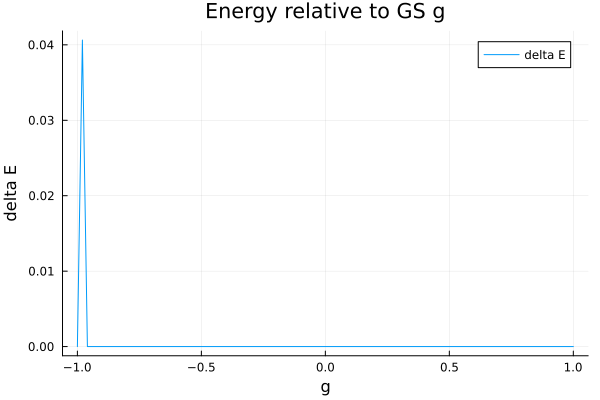

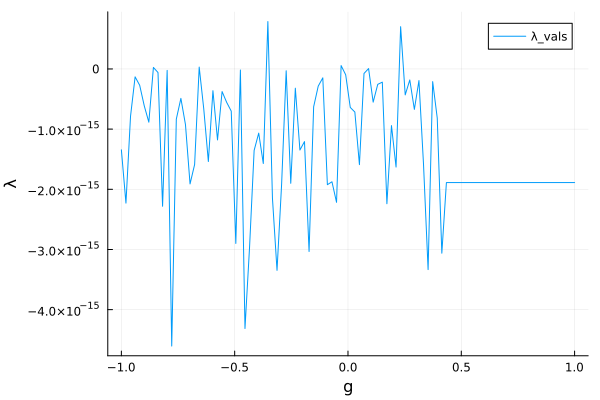

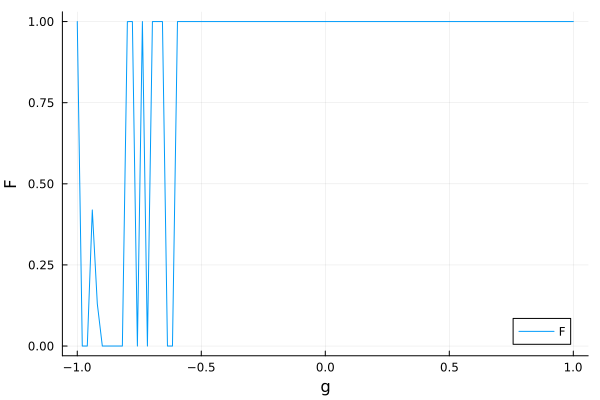

In [3]:
#Verify that the state is the GS of the learned H
pl1 = plot(g_vals, delta_E_HL, label="delta E", title="Energy relative to GS g", xlabel="g", ylabel="delta E")
pl2 = plot(g_vals, λ_vals, label="λ_vals", xlabel="g", ylabel="λ")
pl3 = plot(g_vals, Fidelities_HL, label="F", xlabel="g", ylabel="F")

display(pl1)
display(pl2)
display(pl3)

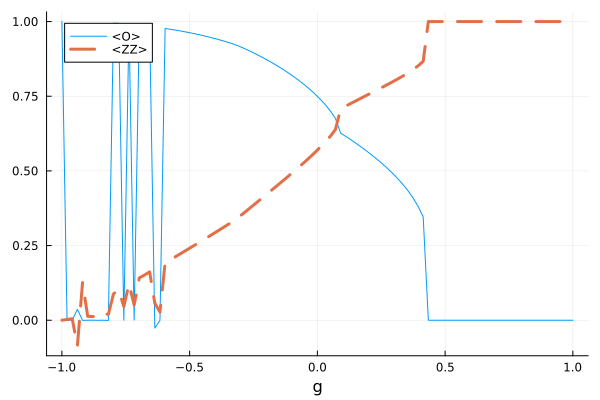

In [4]:
p = plot(g_vals, HL_O_exp, label="<O>",linewidth=1, xlabel="g");
plot!(p, g_vals, HL_ZZ_exp / (N - 1), label="<ZZ>",linestyle=:dash,linewidth=3);
display(p)

Fidelities_HL[ind] = 1.250515303801044e-6


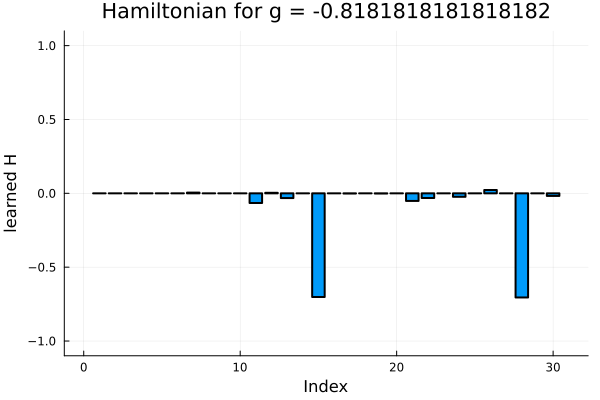

In [5]:
ind = 10
@show Fidelities_HL[ind]

v = H_params[ind]
bar(1:length(v), v;
    xlabel="Index",
    ylabel="learned H",
    legend=false,
    lw=2,
    ylim=(-1.1, 1.1),
    title="Hamiltonian for g = $(g_vals[ind])"
    )

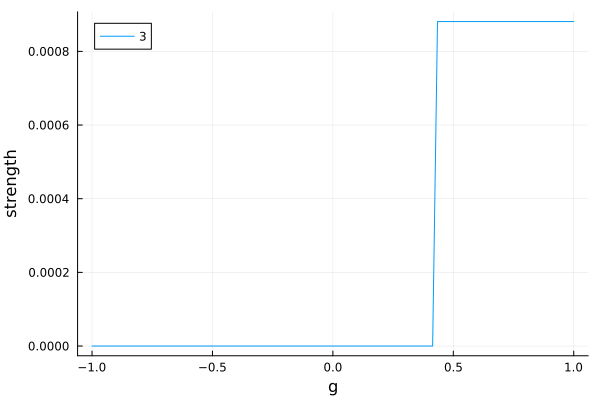

In [6]:
#Analsysis of the learned H
param3_vals = [v[3] for v in H_params]
# param9_vals = [v[9] for v in H_params]

pl1 = plot(g_vals, param3_vals, label="3", xlabel="g", ylabel="strength")
# plot!(pl1, g_vals, param9_vals, label="9", xlabel="g", ylabel="strength")

In [7]:
ind_g = 2
@show Fidelities_HL[ind_g]
@show H_params[ind_g]

Fidelities_HL[ind_g] = 9.295183132642807e-12
H_params[ind_g] = [-1.285496398210314e-6, -5.976004669294534e-8, 2.738818293340228e-11, -3.0748758754992822e-12, 7.692495819155947e-12, 4.161927339470216e-14, -0.00020321825187306742, 0.0002579481542216077, -2.8152335152959897e-9, -3.846345526643124e-9, -0.007178275694075441, 3.9186609280169605e-5, -0.003429691040873619, -2.930060516296572e-8, -0.7078565080553755, -5.0128659221633945e-8, -0.00021475463823914252, -1.071100070022791e-5, -0.020127059577040383, 1.210334266845964e-9, -0.005307086993514313, -0.003519101869328119, -1.9671340872802153e-7, -0.01872310459589906, 5.594087014405899e-7, 0.03902952023270965, -2.500813925083685e-7, -0.704665370936919, 1.0672675928397636e-5, -0.0017108447634478342]


30-element Vector{Float64}:
 -1.285496398210314e-6
 -5.976004669294534e-8
  2.738818293340228e-11
 -3.0748758754992822e-12
  7.692495819155947e-12
  4.161927339470216e-14
 -0.00020321825187306742
  0.0002579481542216077
 -2.8152335152959897e-9
 -3.846345526643124e-9
  ⋮
 -0.003519101869328119
 -1.9671340872802153e-7
 -0.01872310459589906
  5.594087014405899e-7
  0.03902952023270965
 -2.500813925083685e-7
 -0.704665370936919
  1.0672675928397636e-5
 -0.0017108447634478342